In [1]:
import pandas as pd
df=pd.read_csv('c:/data/mart/mart.csv')
df.head()

,seoul,incheon,gyungi,male,female,age10,age2030,age4050,age60,food,...,product,max_ta,max_ws,min_ta,avg_ta,avg_rhm,avg_ws,sum_rn,amount,class
0,1,0,0,0,1,1,0,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,7,0
1,1,0,0,0,1,0,1,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,655,1
2,1,0,0,0,1,0,1,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,282,1
3,1,0,0,0,1,0,1,0,0,0,...,1,4.0,3.5,-3.3,1.2,73,1.6,0.0,35,0
4,1,0,0,0,1,0,1,0,0,0,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,183,1


In [2]:
print(df.describe())

              seoul       incheon        gyungi          male        female  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.333333      0.333333      0.333333      0.459767      0.540233   
std        0.471412      0.471412      0.471412      0.498387      0.498387   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              age10       age2030       age4050         age60          food  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.157400      0.407600      0.336133      0.098867      0.421433   
std        0.364184      0.491396      0.472393    

In [3]:
df.shape

(30000, 21)

In [4]:
train_cols=df.columns[0:19]
X=df[train_cols]
y=df['class']
X.head()

,seoul,incheon,gyungi,male,female,age10,age2030,age4050,age60,food,drink,product,max_ta,max_ws,min_ta,avg_ta,avg_rhm,avg_ws,sum_rn
0,1,0,0,0,1,1,0,0,0,1,0,0,4.0,3.5,-3.3,1.2,73,1.6,0.0
1,1,0,0,0,1,0,1,0,0,1,0,0,4.0,3.5,-3.3,1.2,73,1.6,0.0
2,1,0,0,0,1,0,1,0,0,1,0,0,4.0,3.5,-3.3,1.2,73,1.6,0.0
3,1,0,0,0,1,0,1,0,0,0,0,1,4.0,3.5,-3.3,1.2,73,1.6,0.0
4,1,0,0,0,1,0,1,0,0,0,1,0,4.0,3.5,-3.3,1.2,73,1.6,0.0


In [5]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.246488
         Iterations 9
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.576     
Dependent Variable:    class              AIC:                14823.2519
Date:                  2021-12-16 15:33   BIC:                14964.5041
No. Observations:      30000              Log-Likelihood:     -7394.6   
Df Model:              16                 LL-Null:            -17422.   
Df Residuals:          29983              LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        9.0000                                           
------------------------------------------------------------------------
         Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
------------------------------------------------------------------------
seoul   -1.1371 2229031.4821 -0.0000 1.0000  -43688

In [6]:
df.columns

Index(['seoul', 'incheon', 'gyungi', 'male', 'female', 'age10', 'age2030',
       'age4050', 'age60', 'food', 'drink', 'product', 'max_ta', 'max_ws',
       'min_ta', 'avg_ta', 'avg_rhm', 'avg_ws', 'sum_rn', 'amount', 'class'],
      dtype='object')

In [7]:
cols=['seoul', 'incheon', 'gyungi', 'male', 'female','age10', 'age2030',
'age4050', 'age60', 'food', 'drink', 'product','max_ta', 'max_ws','min_ta', 
'avg_ta', 'avg_rhm', 'avg_ws', 'sum_rn']

In [8]:
df['class'].value_counts()

0    21976
1     8024
Name: class, dtype: int64

In [9]:
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df_samp=pd.concat([X_samp,y_samp],axis=1)


In [10]:
df_samp['class'].value_counts()

0    8024
1    8024
Name: class, dtype: int64

In [11]:
X=X_samp[train_cols]
y=y_samp['class']

In [12]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.281508
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.594    
Dependent Variable:   class              AIC:                9067.2693
Date:                 2021-12-16 15:33   BIC:                9190.2027
No. Observations:     16048              Log-Likelihood:     -4517.6  
Df Model:             15                 LL-Null:            -11124.  
Df Residuals:         16032              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
         Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------
seoul   -0.2813 1553886.3085 -0.0000 1.0000 -3045561.4821 3045560.9195
inc

In [13]:

X=df_samp[cols]
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.281508
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.594    
Dependent Variable:   class              AIC:                9067.2693
Date:                 2021-12-16 15:33   BIC:                9190.2027
No. Observations:     16048              Log-Likelihood:     -4517.6  
Df Model:             15                 LL-Null:            -11124.  
Df Residuals:         16032              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
         Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------
seoul   -0.2813 1553886.3085 -0.0000 1.0000 -3045561.4821 3045560.9195
inc

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe=Pipeline([('scaler',StandardScaler()),('clf',LogisticRegression(random_state=0)),])
params={'clf__C': [0.0001,0.001,0.01,0.1,1.0,10,100],}
grid=GridSearchCV(pipe,params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1}
0.7355435231437558


In [15]:
scores=[]

In [16]:
scores.append(grid.best_score_)
scores

[0.7355435231437558]

In [17]:
from sklearn.tree import DecisionTreeClassifier
pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('clf',DecisionTreeClassifier(random_state=0)),
])
params={
    'clf__max_depth': list(range(3,6))
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 4}
0.7468201993093885


In [18]:
scores.append(grid.best_score_)
scores

[0.7355435231437558, 0.7468201993093885]

In [19]:
tree=grid.best_estimator_['clf']

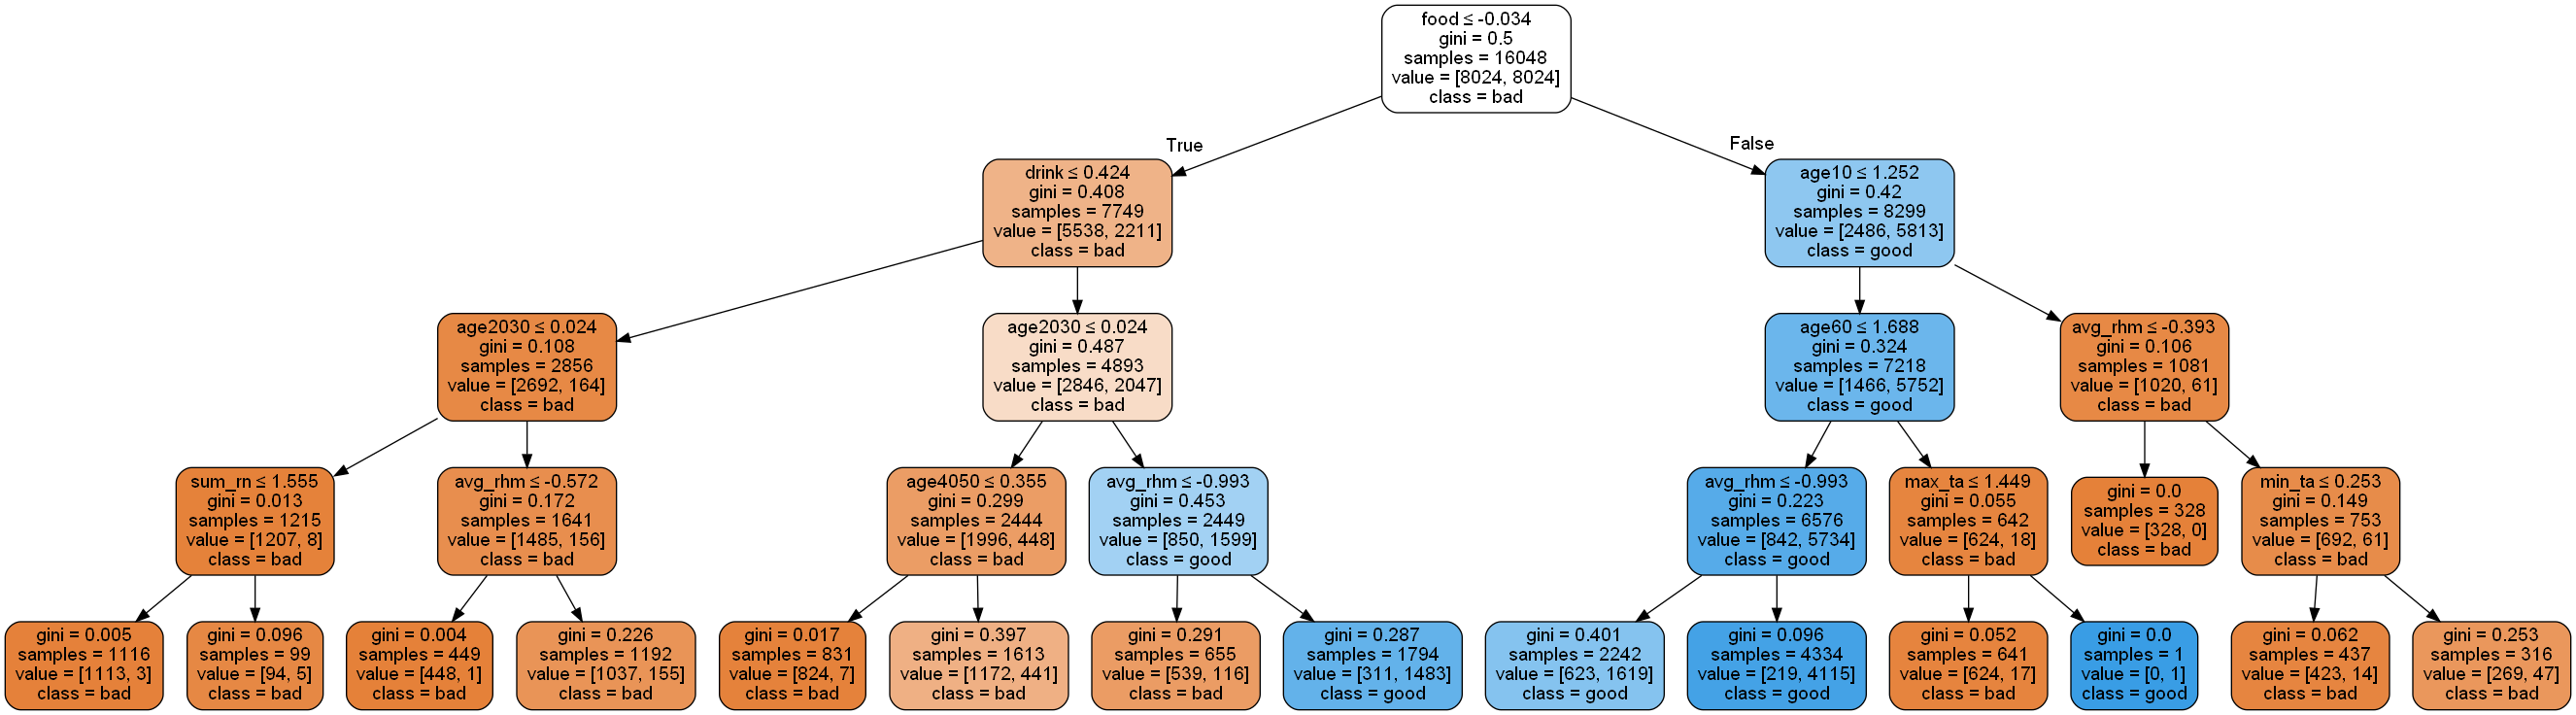

In [20]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data=export_graphviz(tree, out_file=None, feature_names=cols,
class_names=["bad","good"],filled=True,rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

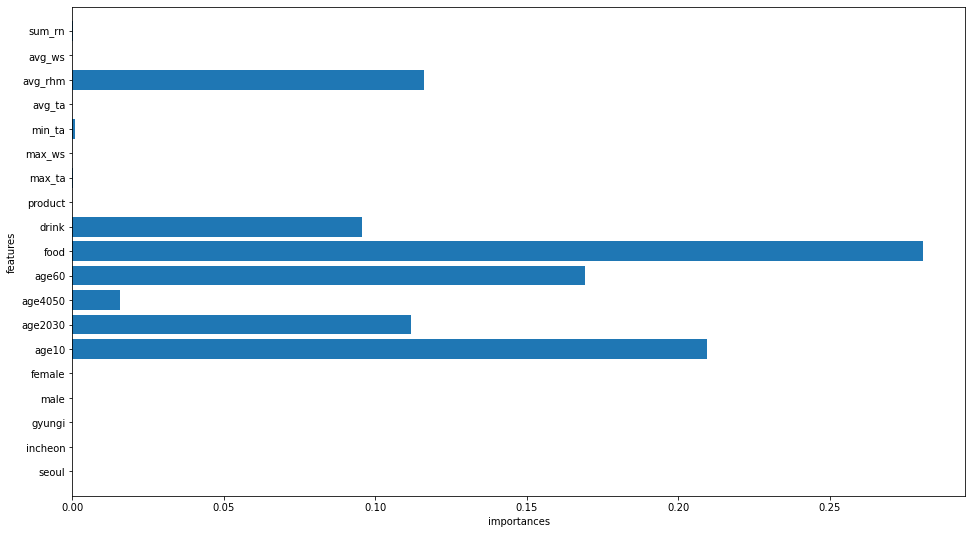

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def plot_tree(model):
    n_features=X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree)

In [22]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state=0)),
])
params = {
'clf__max_depth': list(range(3,6)),
'clf__n_estimators': list(range(10,110,10)),
}
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3, 'clf__n_estimators': 40}
0.6850649930781602


In [23]:
scores.append(grid.best_score_)
scores

[0.7355435231437558, 0.7468201993093885, 0.6850649930781602]

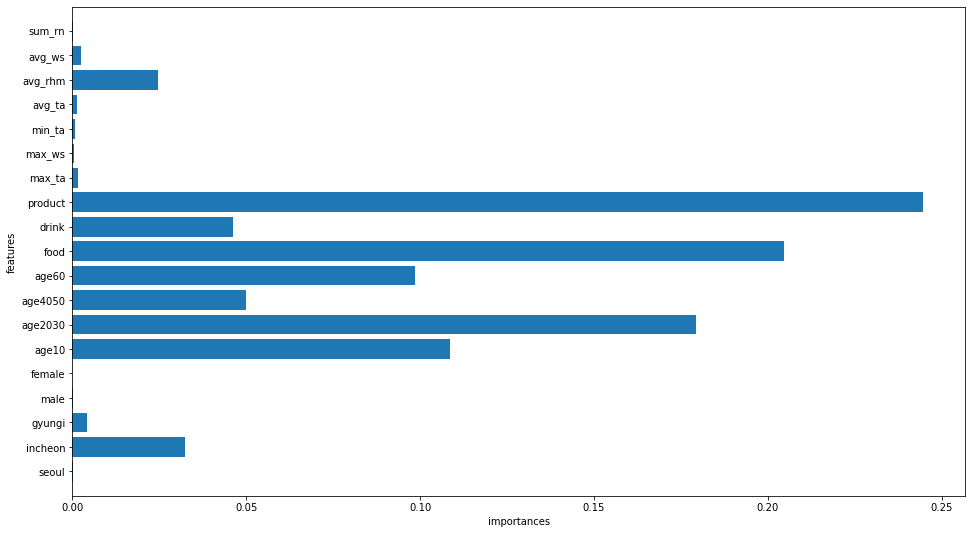

In [24]:
rf=grid.best_estimator_['clf']
plot_tree(rf)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', KNeighborsClassifier()),
])
params = {
'clf__n_neighbors': list(range(1,11)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'clf__n_neighbors': 10}
0.6089848802786674


In [26]:
scores.append(grid.best_score_)
scores

[0.7355435231437558,
 0.7468201993093885,
 0.6850649930781602,
 0.6089848802786674]

In [28]:
from sklearn.svm import SVC
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', SVC(random_state=0)),
])
params = {
'clf__C': [0.01,0.1],
'clf__gamma': [0.001, 0.01]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1, 'clf__gamma': 0.01}
0.6886822179473965


In [29]:
scores.append(grid.best_score_)
scores

[0.7355435231437558,
 0.7468201993093885,
 0.6850649930781602,
 0.6089848802786674,
 0.6089848802786674,
 0.6886822179473965]

KeyError: ''

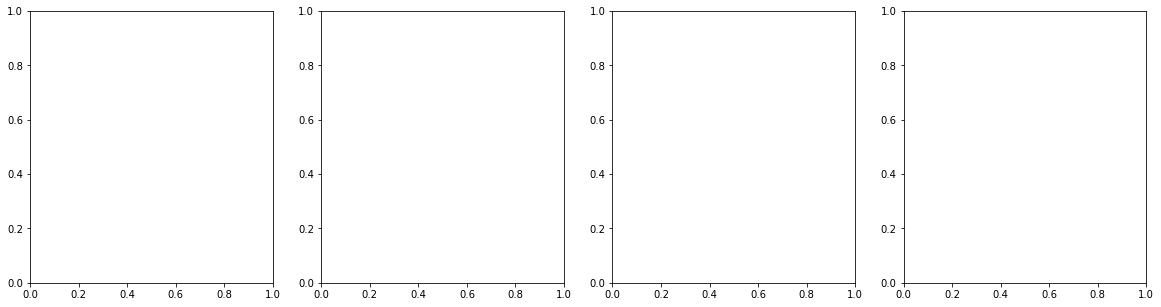

In [30]:
import mglearn

from sklearn.cluster import KMeans
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
idx=0
for k in [2,3,4,5]:
    km = KMeans(n_clusters=k)
    km.fit(X)
    lbls = km.labels_
    mglearn.discrete_scatter(X[""], X[""], lbls, ax=axes[idx])
    idx+=1


['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.73554352 0.7468202  0.68506499 0.60898488 0.60898488 0.60898488
 0.68868222]
최적의 알고리즘: Tree
최적의 정확도: 0.7468201993093885


ValueError: shape mismatch: objects cannot be broadcast to a single shape

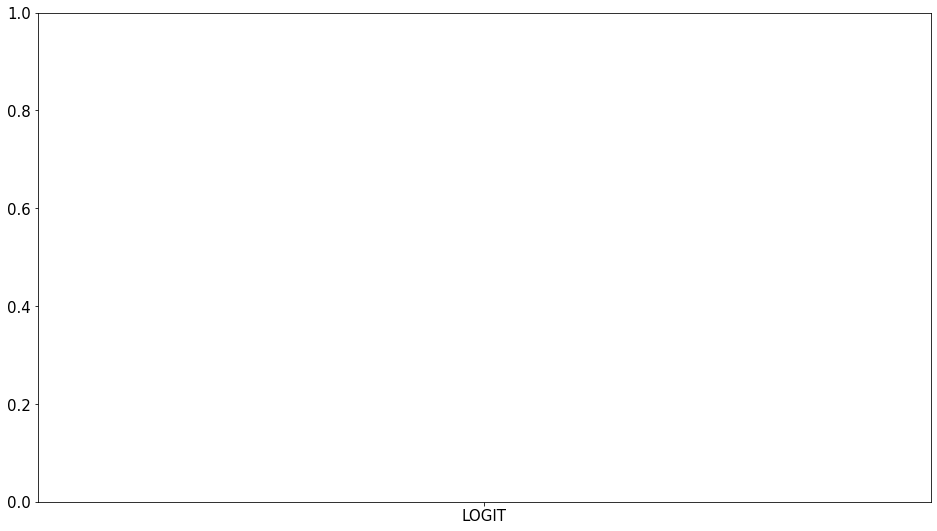

In [ ]:
methods=["LOGIT","Tree","RF","KNN","ANN","SVM"]

scores_arr=np.array(scores) 
max_rate=np.max(scores_arr) 
idx=np.argmax(scores_arr) 

print(methods)
print(scores_arr)
print("최적의 알고리즘:",methods[idx]) 
print("최적의 정확도:",max_rate)


plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier") 
plt.ylabel("Accuracy") 